# Dataset Description

ID: Unique Identifier

Outcome: Result or outcome of a certain event or condition

Age: Age of the individual

Gender: Gender of the individual (1 for male, 2 for female)

BMI: Body Mass Index, a measure of body fat based on height and weight

Hypertensive(high blood pressure),Atrialfibrillation(an irregular heart rhythm),CHD with no MI[( Coronary Heart Disease without Myocardial Infarction) (heart disease without heart attack)],Diabetes,
Deficiencyanemias,
Depression,
Hyperlipemia (high levels of fats in the blood)
Renal failure,COPD(Chronic Obstructive Pulmonary Disease): presence (1) or absence (0) of certain medical conditions.

Systolic blood pressure: The maximum pressure exerted by the heart when pumping blood

Diastolic blood pressure: The minimum pressure exerted by the heart when at rest

Respiratory rate: Rate of breathing, typically measured in breaths per minute

Temperature: Body temperature

SP O2: Oxygen saturation level in the blood

Urine output: Amount of urine produced by the kidneys

Hematocrit: Percentage of blood volume that is occupied by red blood cells

RBC: Red Blood Cell count

MCH: Mean Corpuscular Hemoglobin, the average amount of hemoglobin in a red
blood cell

MCHC: Mean Corpuscular Hemoglobin Concentration, the concentration of hemoglobin in a given volume of packed red blood cells

MCV: Mean Corpuscular Volume, the average volume of a red blood cell

RDW: Red Cell Distribution Width, a measure of the variation in red blood cell size

Leucocyte: White blood cell count

Platelets: Blood platelet count
Neutrophils, Basophils, Lymphocyte: Different types of white blood cells

PT: Prothrombin Time, a measure of blood clotting time

INR: International Normalized Ratio, a standardized way of expressing PT
NT-proBNP: N-terminal pro b-type natriuretic peptide, a hormone associated with heart failure

Creatine kinase: An enzyme found in muscle cells, used as a marker of muscle damage

Creatinine: A waste product produced by muscles, used as a marker of kidney function

Urea nitrogen: A waste product of protein metabolism, used as a marker of kidney function

Glucose: Blood sugar level
Blood potassium, Blood sodium, Blood calcium, Chloride: Electrolytes present in the blood

Anion gap: The difference between the primary measured cations (sodium and potassium) and the primary measured anions (chloride and bicarbonate)

Magnesium ion: Magnesium concentration in the blood

PH: Measure of acidity or alkalinity of the blood

Bicarbonate: A form of carbon dioxide in the blood

Lactic acid: A product of anaerobic metabolism, elevated levels can indicate tissue hypoxia

PCO2: Partial pressure of carbon dioxide in the blood

EF: Ejection Fraction, a measure of how much blood the left ventricle pumps out
with each contraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing mortality dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data01.csv')
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
df.shape

(1177, 51)

In [ ]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

# Checking the datatype and  non null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [ ]:
df.describe().style.background_gradient(cmap = 'PuBu')

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1

# Checking missing value

In [ ]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

## Simple Imputer
To fill the missing values with mean

In [ ]:
from pandas import DataFrame
from sklearn.impute import SimpleImputer
df.fillna(value=np.nan,inplace=True)
si = SimpleImputer(missing_values = np.nan, strategy ='mean')
si.fit(df)
df = DataFrame(si.transform(df),columns=df.columns)

In [ ]:
df.isnull().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

**All missing value is treated**

In [ ]:
df['outcome'].value_counts()

0.000000    1017
1.000000     159
0.135204       1
Name: outcome, dtype: int64

In [ ]:
df.drop(df[(df.outcome >0 )& (df.outcome<1)].index,inplace=True)

In [ ]:
df['outcome'].value_counts()

0.0    1017
1.0     159
Name: outcome, dtype: int64

Deleting the features which are not required for the analysis

In [ ]:
df=df.drop(['group','ID','gendera'],axis=1)

In [ ]:
df.columns

Index(['outcome', 'age', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

**Columns which are not required for the analysis are dropped**


# Exploratory Data Analysis

In [ ]:
correlation = df.corr()
correlation

,outcome,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
outcome,1.000000,0.064510,-0.053076,-0.072441,0.100975,-0.014694,-0.049997,-0.099513,-0.060883,-0.053466,...,-0.066366,-0.184058,0.059834,0.229676,0.074033,-0.140239,-0.222650,0.215853,-0.046357,-0.024138
age,0.064510,1.000000,-0.349928,0.176768,0.291674,0.037776,-0.089836,0.015511,-0.094358,0.115388,...,0.105644,-0.008924,0.139260,-0.004764,0.088651,0.095204,-0.061097,0.005679,-0.109724,0.054138
BMI,-0.053076,-0.349928,1.000000,-0.028936,-0.107449,-0.057501,0.141277,-0.018911,0.022985,-0.016148,...,0.044804,0.086031,-0.167219,-0.112042,0.015525,-0.105224,0.263997,-0.079839,0.284118,0.053923
hypertensive,-0.072441,0.176768,-0.028936,1.000000,0.007244,0.010205,0.129122,-0.005415,-0.043612,0.226478,...,0.034395,0.081112,-0.017357,0.067240,0.000870,0.020656,0.011079,-0.019560,-0.007093,0.012440
atrialfibrillation,0.100975,0.291674,-0.107449,0.007244,1.000000,-0.003687,-0.012140,-0.098022,-0.059171,0.049866,...,-0.028091,0.018083,0.021955,0.050194,0.067061,0.041571,-0.071900,0.044013,-0.089002,0.011550
CHD with no MI,-0.014694,0.037776,-0.057501,0.010205,-0.003687,1.000000,0.009142,0.043152,0.046633,0.047576,...,-0.071736,0.020915,-0.057409,0.024923,0.016787,0.061270,-0.009370,0.010017,-0.060051,-0.146165
diabetes,-0.049997,-0.089836,0.141277,0.129122,-0.012140,0.009142,1.000000,0.062037,0.005698,0.134299,...,0.032411,0.079858,-0.026699,0.036929,0.018225,-0.019816,0.044081,0.031144,0.058967,-0.026165
deficiencyanemias,-0.099513,0.015511,-0.018911,-0.005415,-0.098022,0.043152,0.062037,1.000000,0.063777,0.027155,...,-0.009583,-0.049630,0.063917,-0.016079,0.025042,0.008418,-0.059122,-0.104007,-0.067666,-0.031308
depression,-0.060883,-0.094358,0.022985,-0.043612,-0.059171,0.046633,0.005698,0.063777,1.000000,0.042116,...,-0.028781,0.010263,-0.023125,-0.014536,-0.081614,0.070449,0.005960,-0.002733,-0.058815,-0.031101
Hyperlipemia,-0.053466,0.115388,-0.016148,0.226478,0.049866,0.047576,0.134299,0.027155,0.042116,1.000000,...,-0.067853,0.093400,-0.061949,0.036953,-0.012998,0.016511,-0.006966,0.029776,-0.046304,-0.064585


##Heatmap

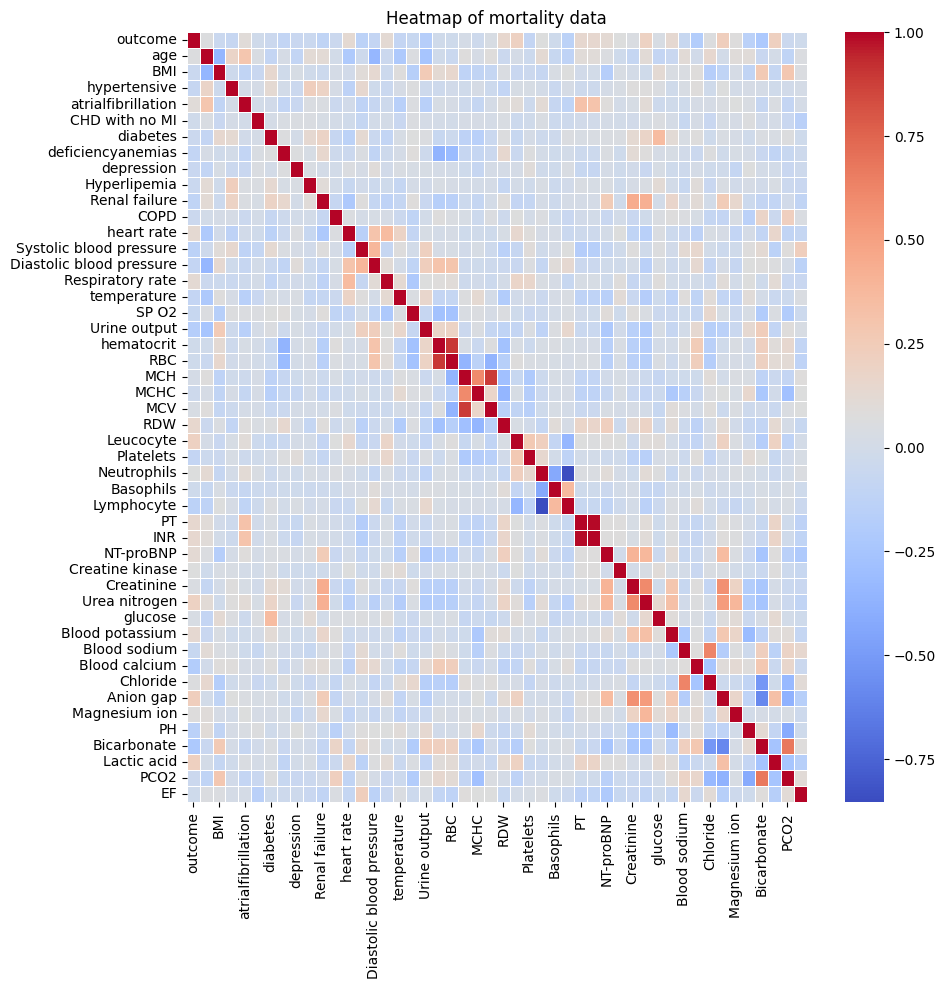

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=False,cmap='coolwarm',linewidths=0.5)
plt.title('Heatmap of mortality data')
plt.show()

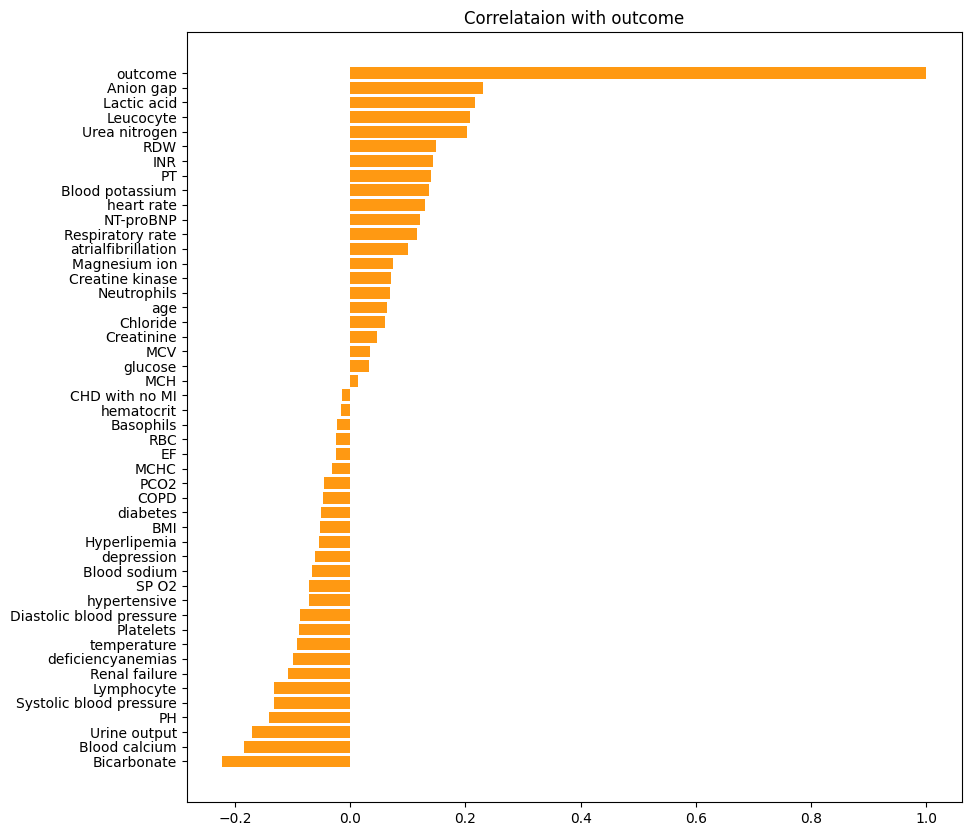

In [ ]:
fig = plt.figure(figsize = (10, 10))
target_corr = pd.DataFrame(df.corr()['outcome'].sort_values(ascending = True))
plt.barh(target_corr.index, target_corr['outcome'],color="#FF9912")
plt.title('Correlataion with outcome')
plt.show()

##Count plot
To find the number of patients with specific diseases (in columns) with respect to outcome.

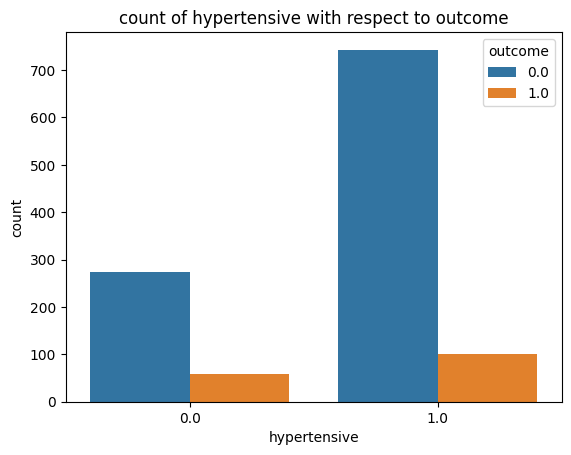

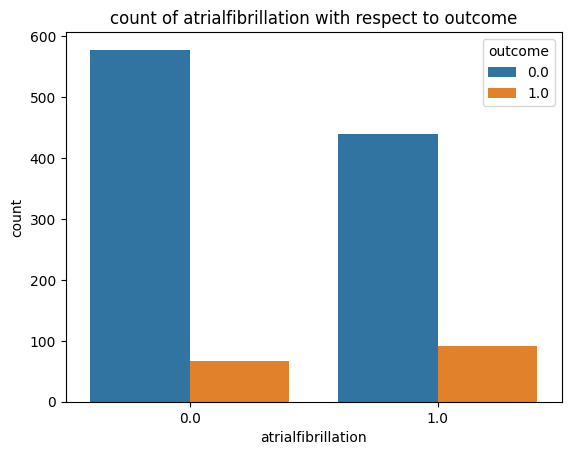

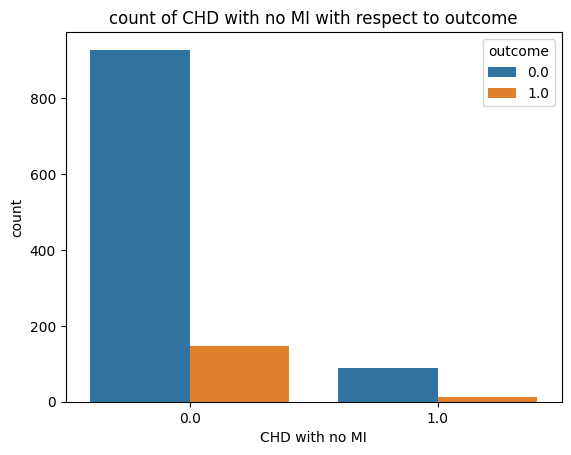

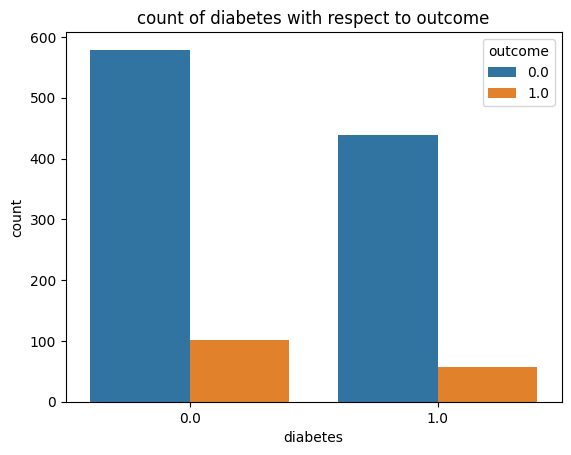

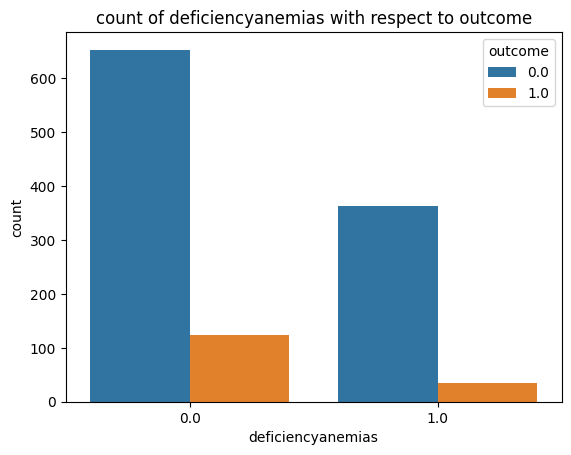

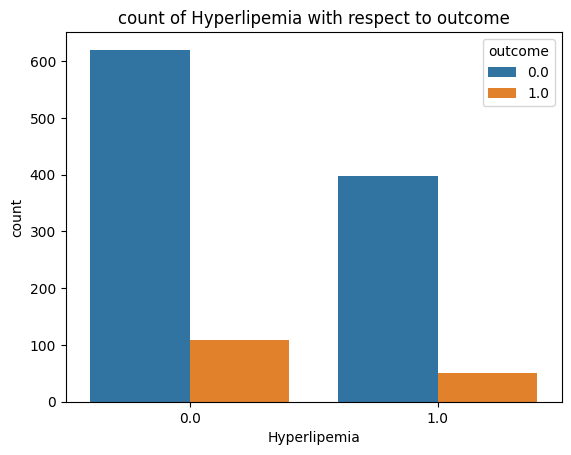

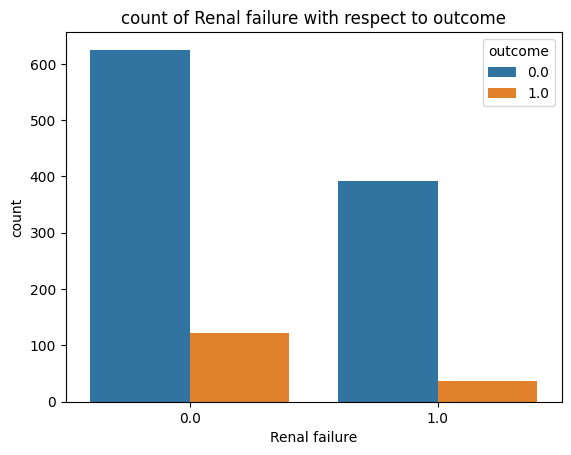

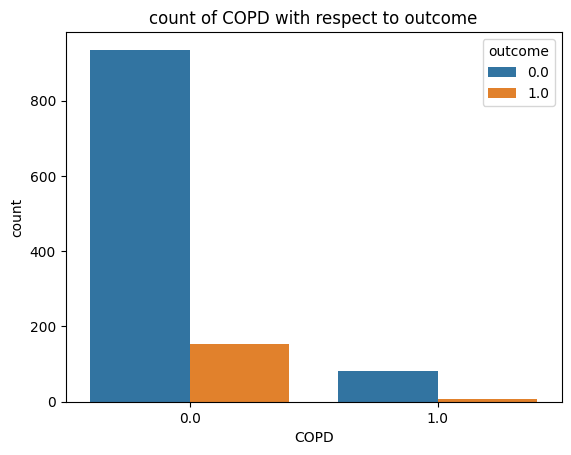

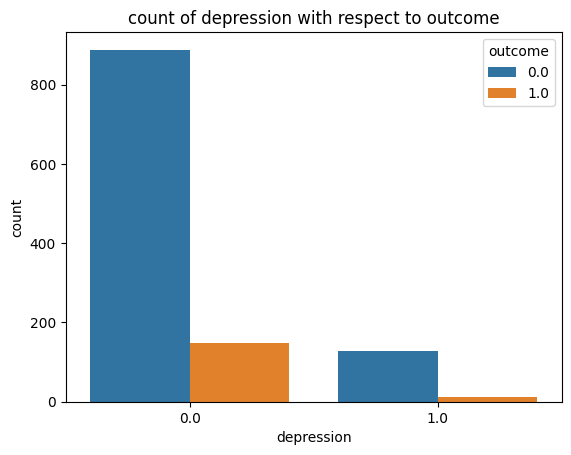

In [ ]:
columns=['hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','Hyperlipemia','Renal failure','COPD','depression']
for col in columns:
  sns.countplot(data=df,x=col,hue='outcome')
  plt.title(f'count of {col} with respect to outcome')
  plt.show()

##Scatter Plot
Identifing the patients with Low and high level of mean corpuscular hemoglobin.
The plot is plotted with the Systolic and Diastolic blood pressure with respect to age

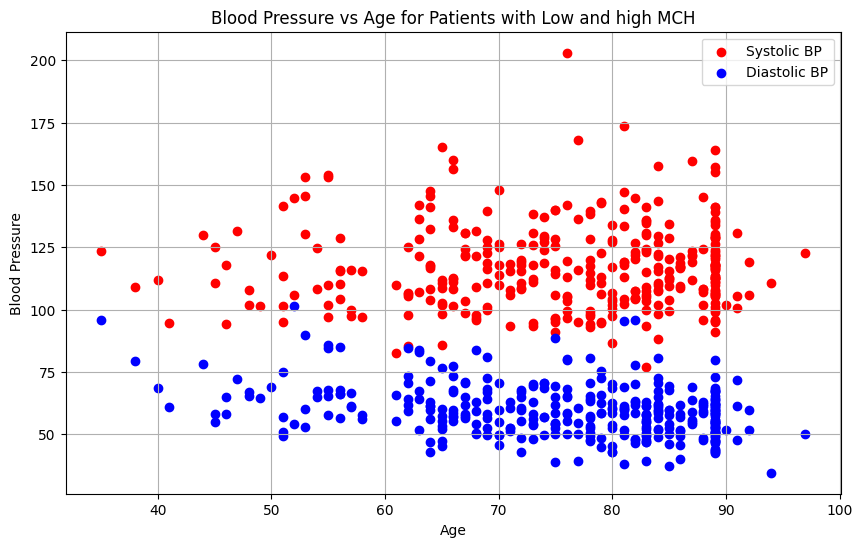

In [ ]:
ab_mch_data= df[(27< df['MCH'])&(df['MCH'] > 31)]
plt.figure(figsize=(10, 6))
plt.scatter(ab_mch_data['age'], ab_mch_data['Systolic blood pressure'], color='red', label='Systolic BP')
plt.scatter(ab_mch_data['age'], ab_mch_data['Diastolic blood pressure'], color='blue', label='Diastolic BP')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure vs Age for Patients with Low and high MCH')
plt.legend()
plt.grid(True)
plt.show()

## **Splitting dataset into train and test**

In [ ]:
x=df.drop('outcome',axis='columns')
y=df.outcome

Dimension of the splitted datasets

In [ ]:
print(x.shape)
print(y.shape)

(1176, 47)
(1176,)


# Dimensionality reduction
Principal Component Analysis is used. The datset with 48 features is reduced to 25 features for better accuracy.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=25)
X_pca = pca.fit_transform(x)

#Defining all the classifiers

In [ ]:
classifiers = {'random forest':RandomForestClassifier(n_estimators=50,random_state=42),\
               'Decision Tree': DecisionTreeClassifier(),'knn': KNeighborsClassifier(n_neighbors=15)\
               ,'Gradient boost':GradientBoostingClassifier()}

User-defined function for finding the evaluation metrics of the models.

In [ ]:
def performance(x_train, x_test, y_train, y_test, classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, pre, rec, f1

User-fined function finding the optimal split ratio and the model with high accuracy.

In [ ]:
def find_optimal_split_ratio(x, y, classifiers, splitting_ratios):
    optimal_ratio = None
    best_cls=None
    max_accuracy = 0.0
    header = ["Test Ratio", "Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
    table_data = []
    for test_ratio in splitting_ratios:
      xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=test_ratio, random_state=0)
      smote = SMOTE(random_state=10)
      x_re, y_re = smote.fit_resample(xtrain, ytrain)
      for classifier_name, classifier in classifiers.items():
        accuracy, precision, recall, f1 = performance(x_re, xtest, y_re, ytest, classifier)
        row_data = [f"{test_ratio:.2f}", classifier_name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"]
        table_data.append(row_data)
        if (accuracy > max_accuracy):
          max_accuracy = accuracy
          optimal_ratio = test_ratio
          best_cls=classifier_name

    print(f"Optimal Splitting Ratio:{optimal_ratio:.2f} ")
    print('best model: ',best_cls)
    print(tabulate(table_data, headers=header, tablefmt="grid"))

Assigning the splitting ratio and using the udf for the output by reducing the dimension of the dataset

In [ ]:
splitting_ratios=np.linspace(0.2,0.6)
print(find_optimal_split_ratio(X_pca,y,classifiers,splitting_ratios))

Optimal Splitting Ratio:0.23 
best model:  random forest
+--------------+----------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier     |   Accuracy |   Precision |   Recall |   F1-score |
+==============+================+============+=============+==========+============+
|         0.2  | random forest  |     0.8771 |      0.8534 |   0.8771 |     0.8622 |
+--------------+----------------+------------+-------------+----------+------------+
|         0.2  | Decision Tree  |     0.75   |      0.8222 |   0.75   |     0.7811 |
+--------------+----------------+------------+-------------+----------+------------+
|         0.2  | knn            |     0.6229 |      0.8272 |   0.6229 |     0.6929 |
+--------------+----------------+------------+-------------+----------+------------+
|         0.2  | Gradient boost |     0.8263 |      0.8505 |   0.8263 |     0.8372 |
+--------------+----------------+------------+-------------+----------+------------+
|       

Assigning the splitting ratio and using the udf for the output of the original dataset.

In [ ]:
print(find_optimal_split_ratio(x,y,classifiers,splitting_ratios))

Optimal Splitting Ratio:0.54 
best model:  random forest
+--------------+----------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier     |   Accuracy |   Precision |   Recall |   F1-score |
+==============+================+============+=============+==========+============+
|         0.2  | random forest  |     0.8475 |      0.8245 |   0.8475 |     0.835  |
+--------------+----------------+------------+-------------+----------+------------+
|         0.2  | Decision Tree  |     0.7924 |      0.8311 |   0.7924 |     0.8098 |
+--------------+----------------+------------+-------------+----------+------------+
|         0.2  | knn            |     0.6229 |      0.8272 |   0.6229 |     0.6929 |
+--------------+----------------+------------+-------------+----------+------------+
|         0.2  | Gradient boost |     0.8729 |      0.8551 |   0.8729 |     0.8625 |
+--------------+----------------+------------+-------------+----------+------------+
|       